In [1]:
import pandas as pd

In [3]:
# Load the Sentiment140 dataset
df = pd.read_csv('Sentiment140.csv', encoding='ISO-8859-1', header=None, names=['target', 'id', 'date', 'flag', 'user', 'tweet'])

Data Exploration and Cleaning

In [4]:
df.head(10)

,target,id,date,flag,user,tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
5,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
6,0,1467811592,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,mybirch,Need a hug
7,0,1467811594,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,coZZ,@LOLTrish hey long time no see! Yes.. Rains a...
8,0,1467811795,Mon Apr 06 22:20:05 PDT 2009,NO_QUERY,2Hood4Hollywood,@Tatiana_K nope they didn't have it
9,0,1467812025,Mon Apr 06 22:20:09 PDT 2009,NO_QUERY,mimismo,@twittera que me muera ?


In [5]:
df.shape

(1600000, 6)

In [7]:
df['target'].value_counts()

0    800000
4    800000
Name: target, dtype: int64

In [8]:
df.drop(['id', 'date', 'flag', 'user'], axis=1, inplace=True)

In [9]:
df.head()

,target,tweet
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [10]:
# Map the target values to 0 and 1
df['target'] = df['target'].map({0: 0, 4: 1})

In [11]:
# Remove any rows with missing values
df.dropna()

,target,tweet
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."
...,...,...
1599995,1,Just woke up. Having no school is the best fee...
1599996,1,TheWDB.com - Very cool to hear old Walt interv...
1599997,1,Are you ready for your MoJo Makeover? Ask me f...
1599998,1,Happy 38th Birthday to my boo of alll time!!! ...


Data Visualization

In [12]:
# Some statistics about the dataset
print('Number of Positive Tweets: ', df[df['target'] == 1].shape[0])
print('Number of Negative Tweets: ', df[df['target'] == 0].shape[0])
print('Total Number of Tweets: ', df.shape[0])
print('Average Length of Positive Tweets: ', df[df['target'] == 1]['tweet'].str.len().mean())
print('Average Length of Negative Tweets: ', df[df['target'] == 0]['tweet'].str.len().mean())

Number of Positive Tweets:  800000
Number of Negative Tweets:  800000
Total Number of Tweets:  1600000
Average Length of Positive Tweets:  73.8784325
Average Length of Negative Tweets:  74.30179


<AxesSubplot:title={'center':'Number of Positive and Negative Tweets'}>

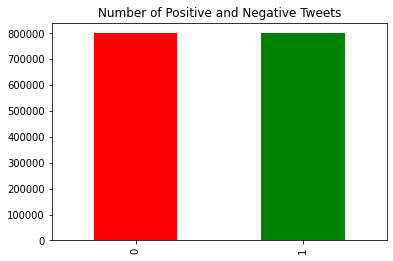

In [15]:
# A bar chart showing the number of positive and negative tweets
df['target'].value_counts().plot(kind='bar', title='Number of Positive and Negative Tweets', x='Sentiment', y='Number of Tweets', color=['red', 'green'])

Machine Learning

In [27]:
!pip install numpy==1.16.1

Defaulting to user installation because normal site-packages is not writeable
  Using cached numpy-1.16.1.zip (5.1 MB)
  Preparing metadata (setup.py) ... done
anceled
ERROR: Operation cancelled by user


In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['tweet'], df['target'], test_size=0.2, random_state=42)

# Create a pipeline that vectorizes the tweets, then trains a model
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english')),
    ('clf', LogisticRegression())
])

# Train the model
pipeline.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = pipeline.predict(X_test)
accuracy = (y_pred == y_test).mean()
print(f"Test accuracy: {accuracy:.3f}")


RuntimeError: module compiled against API version 0x10 but this version of numpy is 0xf . Check the section C-API incompatibility at the Troubleshooting ImportError section at https://numpy.org/devdocs/user/troubleshooting-importerror.html#c-api-incompatibility for indications on how to solve this problem .

ImportError: numpy.core.multiarray failed to import

In [ ]:
# Make predictions and evaluate the model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

predictions = pipeline.predict(X_test)
print(classification_report(y_test, predictions))
print('Confusion Matrix: ', confusion_matrix(y_test, predictions))
print('Accuracy: ', accuracy_score(y_test, predictions))
print('F1 Score: ', f1_score(y_test, predictions))
print('Precision: ', precision_score(y_test, predictions))
print('Recall: ', recall_score(y_test, predictions))
